In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [36]:
df = pd.read_csv(r"C:\Users\jarvi\.vscode\Python\TNSIF_AIML_DBIT\student_kmeans_dataset.csv")

In [38]:
df.head(13)


,Student_ID,Study_Hours,Exam_Score
0,1,2,20
1,2,3,25
2,3,4,28
3,4,6,45
4,5,7,50
5,6,8,48
6,7,10,70
7,8,11,68
8,9,12,72
9,10,14,85


In [39]:
df.columns


Index(['Student_ID', 'Study_Hours', 'Exam_Score'], dtype='object')

In [40]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

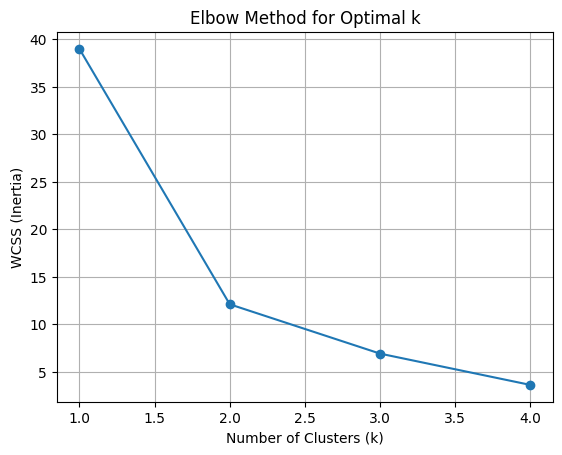

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(numeric_df)

# Elbow Method
wcss = []
K_range = range(1, 5)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

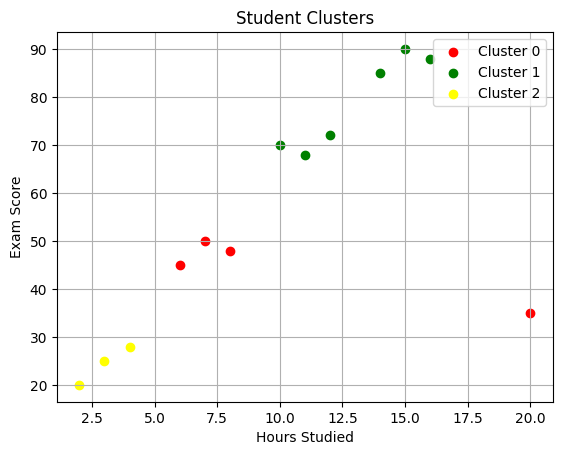

    Student_ID  Study_Hours  Exam_Score  Cluster
0            1            2          20        2
1            2            3          25        2
2            3            4          28        2
3            4            6          45        0
4            5            7          50        0
5            6            8          48        0
6            7           10          70        1
7            8           11          68        1
8            9           12          72        1
9           10           14          85        1
10          11           15          90        1
11          12           16          88        1
12          13           20          35        0


In [42]:
X = df[['Study_Hours', 'Exam_Score']]

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

colors = ['red', 'green', 'yellow','blue','violet']
for cluster in range(3):
    subset = df[df['Cluster'] == cluster]
    plt.scatter(subset['Study_Hours'], subset['Exam_Score'], 
                color=colors[cluster], label=f'Cluster {cluster}')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Student Clusters')
plt.legend()
plt.grid(True)
plt.show()

print(df)

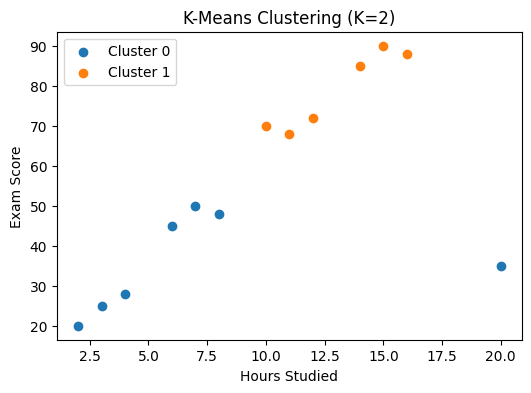

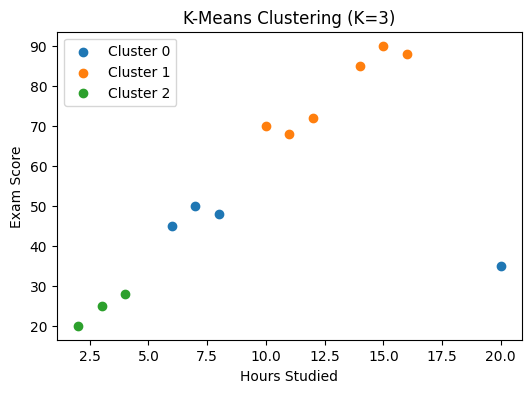

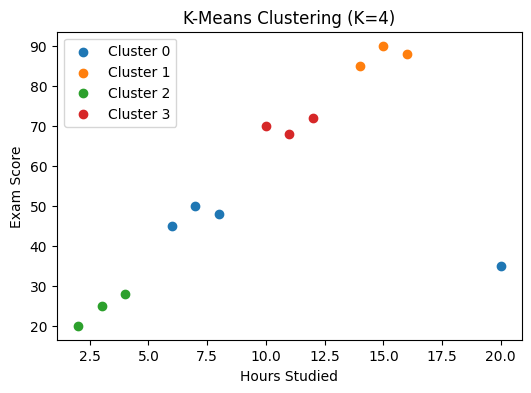

   Student_ID  Study_Hours  Exam_Score  Cluster  Cluster_2  Cluster_3  \
0           1            2          20        2          0          2   
1           2            3          25        2          0          2   
2           3            4          28        2          0          2   
3           4            6          45        0          0          0   
4           5            7          50        0          0          0   
5           6            8          48        0          0          0   
6           7           10          70        1          1          1   
7           8           11          68        1          1          1   
8           9           12          72        1          1          1   
9          10           14          85        1          1          1   

   Cluster_4  
0          2  
1          2  
2          2  
3          0  
4          0  
5          0  
6          3  
7          3  
8          3  
9          1  


In [43]:
for k in [2, 3,4]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f'Cluster_{k}'] = kmeans.fit_predict(X)

    plt.figure(figsize=(6,4))
    for cluster in range(k):
        subset = df[df[f'Cluster_{k}'] == cluster]
        plt.scatter(subset['Study_Hours'], subset['Exam_Score'], label=f'Cluster {cluster}')
    plt.xlabel('Hours Studied')
    plt.ylabel('Exam Score')
    plt.title(f'K-Means Clustering (K={k})')
    plt.legend()
    plt.show()

# View cluster assignments
print(df.head(10))